# Exploratory Data Analysis

For further research you can check <br>
[ESA’S ANNUAL SPACE ENVIRONMENT REPORT](https://www.sdo.esoc.esa.int/environment_report/Space_Environment_Report_latest.pdf) <br>
[Nasa Space Debris](https://www.nasa.gov/headquarters/library/find/bibliographies/space-debris/)

#### Read Data and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('space_decay.csv')
df.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


## Explanation of Data

In [3]:
df.describe()

,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,...,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.0,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,14372.0,...,14372.000000,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000,14333.000000,0.0,1.437200e+04,1.437200e+04
mean,2.0,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,39558.160381,999.0,...,0.000049,2.307751e-07,10636.185210,223.521557,5721.060178,2795.040245,2004.507570,NaN,3.194186e+06,1.885638e+08
std,0.0,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,7619.846133,0.0,...,0.002391,1.485939e-05,9580.627227,446.517041,13016.299008,7943.045264,13.565227,NaN,3.119117e+03,1.393616e+05
min,2.0,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,26741.000000,999.0,...,-0.014873,-4.210300e-05,6542.850000,87.783000,183.393000,73.279000,1961.000000,NaN,3.142499e+06,1.860926e+08
25%,2.0,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,33965.750000,999.0,...,0.000001,0.000000e+00,6956.246750,96.232750,599.876000,546.115000,1997.000000,NaN,3.194431e+06,1.885665e+08
50%,2.0,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,40165.500000,999.0,...,0.000010,0.000000e+00,7177.549000,100.861000,843.686000,702.433500,2002.000000,NaN,3.194950e+06,1.885986e+08
75%,2.0,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,45173.500000,999.0,...,0.000032,0.000000e+00,7468.055000,107.046000,1207.919500,831.959750,2018.000000,NaN,3.195064e+06,1.886107e+08
max,2.0,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,270288.000000,999.0,...,0.225321,1.654800e-03,304049.635000,27808.429000,372136.402000,224547.015000,2021.000000,NaN,3.195727e+06,1.886250e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [5]:
df.isnull().sum()

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [6]:
df.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

### Analyzing of Columns

#### Metadata & Identification Columns

CCSDS_OMM_VERS – Version of the CCSDS (Consultative Committee for Space Data Systems) Orbit Mean-Elements Message (OMM) format. ['2'] <br>
COMMENT – Any additional notes or remarks.['GENERATED VIA SPACE-TRACK.ORG API']<br>
CREATION_DATE – Date when the data was generated.<br>
ORIGINATOR – The organization responsible for generating the data.['18 SPCS']<br>
OBJECT_NAME – The name of the object (e.g., a satellite or debris).<br>
OBJECT_ID – The official identifier of the object, typically indicating the launch year, launch number, and piece of the launch (e.g., "2022-045A").<br>
CENTER_NAME – The central body around which the object orbits (e.g., Earth).<br>
REF_FRAME – The reference coordinate frame used (e.g., Earth-Centered Inertial).<br>
TIME_SYSTEM – The time standard used in the dataset (e.g., UTC, TAI).<br>
MEAN_ELEMENT_THEORY – The theoretical model used for mean orbital elements.<br>

>After looking at unique values OBJECT_NAME and OBJECT_ID will be taken to dataset (others have only one unique value)

In [7]:
df = df.drop(['CCSDS_OMM_VERS', 'COMMENT','CREATION_DATE', 'ORIGINATOR', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM','MEAN_ELEMENT_THEORY'], errors='ignore', axis=1)

#### Orbital Elements

EPOCH – The specific time at which the orbital elements are valid.<br>
MEAN_MOTION – The number of orbits the object completes per day.<br>
ECCENTRICITY – The shape of the orbit, where 0 = circular and values closer to 1 = highly elliptical.<br>
INCLINATION – The tilt of the orbit relative to Earth's equatorial plane, in degrees.<br>
RA_OF_ASC_NODE (Right Ascension of Ascending Node - RAAN) – The longitude of the point where the object crosses the equatorial plane going north.<br>
ARG_OF_PERICENTER – The angle that defines where the closest approach (perigee) happens in the orbit.<br>
MEAN_ANOMALY – The fraction of the orbit completed since the last perigee, expressed in degrees.

>In this part all columns have important information so I will keep all

### Additional Orbital Parameters

EPHEMERIS_TYPE – The type of ephemeris data used (typically 0 for Two-Line Elements, TLE).<br>
CLASSIFICATION_TYPE – Indicates whether the object is publicly available ('U' for unclassified) or classified.<br>
NORAD_CAT_ID – A unique numerical identifier assigned by NORAD (North American Aerospace Defense Command).<br>
ELEMENT_SET_NO – The version number of the orbital element set.[999]<br>
REV_AT_EPOCH – The number of orbits the object has completed since launch at the epoch time.<br>

>Only NORAD_CAT_ID and REV_AT_EPOCH will stay others have only one value

In [8]:
df = df.drop(columns=['EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE','ELEMENT_SET_NO'], errors='ignore', axis=1)

### Drag & Perturbation Parameters

BSTAR – The drag coefficient that represents atmospheric drag effects on the object.<br>
MEAN_MOTION_DOT – The rate of change of the mean motion due to perturbations (e.g., atmospheric drag).<br>
MEAN_MOTION_DDOT – The second derivative of the mean motion, indicating further changes in the orbital period.<br>

>In this part all columns have important information so I will keep all

### Physical & Positional Data

SEMIMAJOR_AXIS – The average distance from the object to the center of its orbit, in kilometers.<br>
PERIOD – The time (in minutes) for the object to complete one orbit.<br>
APOAPSIS – The farthest distance (in kilometers) from the Earth in the orbit.<br>
PERIAPSIS – The closest distance (in kilometers) to the Earth in the orbit.<br>

>In this part all columns have important information so I will keep all

### Object Classification & Size

OBJECT_TYPE – The type of object, such as 'PAYLOAD' (satellite), 'DEBRIS', etc.<br>
RCS_SIZE – The radar cross-section size, indicating how large the object appears to radar sensors (small, medium, large, or unknown).

>In this part all columns have important information so I will keep all

### Launch & Decay Information

COUNTRY_CODE – The country responsible for the object.<br>
LAUNCH_DATE – The date when the object was launched.<br>
SITE – The launch site from which the object was sent into space.<br>
DECAY_DATE – The date when the object re-entered Earth’s atmosphere (currently all values are null, meaning no recorded decay events).<br>

>Only DECAY_DATE will be removed because it's null others will stay

In [9]:
df = df.drop(columns=['DECAY_DATE'], errors='ignore', axis=1)

### File & Data Tracking Information and Two-Line Element Set (TLE) Data


FILE – An internal file reference number.<br>
GP_ID – A unique identifier for each general perturbation set of orbital elements.<br>
TLE_LINE0 – The first line of the TLE data, often containing the object’s name.<br>
TLE_LINE1 – The first standard line of the TLE orbital data.<br>
TLE_LINE2 – The second standard line of the TLE orbital data, containing additional orbital parameters.<br>

In [10]:
df = df.drop(columns=['FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'], errors='ignore', axis=1)

In [11]:
df.head()

,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,NORAD_CAT_ID,...,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE
0,ARIANE 42P+ DEB,1992-072J,2021-10-31T22:46:50.340864,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,26741,...,0.0,20668.618,492.864,27784.871,796.095,DEBRIS,MEDIUM,FR,1992.0,FRGUI
1,SL-8 DEB,1979-028C,2021-10-31T16:32:17.360448,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,26743,...,0.0,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0,PKMTR
2,GSAT 1,2001-015A,2021-11-01T05:22:43.421952,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,26745,...,0.0,41197.852,1386.984,35797.696,33841.738,PAYLOAD,LARGE,IND,2001.0,SRI
3,CZ-4 DEB,1999-057MB,2021-10-31T11:11:24.198720,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,26754,...,0.0,7015.076,97.456,679.465,594.417,DEBRIS,SMALL,PRC,1999.0,TSC
4,CZ-4 DEB,1999-057MC,2021-10-31T17:46:46.681248,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,26755,...,0.0,7031.400,97.796,697.039,609.491,DEBRIS,SMALL,PRC,1999.0,TSC


In [12]:
df.columns

Index(['OBJECT_NAME', 'OBJECT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'NORAD_CAT_ID', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE'],
      dtype='object')

## Statistical Analysis

#### Cleaning the Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECT_NAME        14372 non-null  object 
 1   OBJECT_ID          14333 non-null  object 
 2   EPOCH              14372 non-null  object 
 3   MEAN_MOTION        14372 non-null  float64
 4   ECCENTRICITY       14372 non-null  float64
 5   INCLINATION        14372 non-null  float64
 6   RA_OF_ASC_NODE     14372 non-null  float64
 7   ARG_OF_PERICENTER  14372 non-null  float64
 8   MEAN_ANOMALY       14372 non-null  float64
 9   NORAD_CAT_ID       14372 non-null  int64  
 10  REV_AT_EPOCH       14372 non-null  int64  
 11  BSTAR              14372 non-null  float64
 12  MEAN_MOTION_DOT    14372 non-null  float64
 13  MEAN_MOTION_DDOT   14372 non-null  float64
 14  SEMIMAJOR_AXIS     14372 non-null  float64
 15  PERIOD             14372 non-null  float64
 16  APOAPSIS           143

In [14]:
df.isna().sum()

OBJECT_NAME            0
OBJECT_ID             39
EPOCH                  0
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
NORAD_CAT_ID           0
REV_AT_EPOCH           0
BSTAR                  0
MEAN_MOTION_DOT        0
MEAN_MOTION_DDOT       0
SEMIMAJOR_AXIS         0
PERIOD                 0
APOAPSIS               0
PERIAPSIS              0
OBJECT_TYPE            0
RCS_SIZE             198
COUNTRY_CODE          39
LAUNCH_DATE           39
SITE                  39
dtype: int64

In [15]:
bs= pd.isnull(df["OBJECT_ID"])
data = df[bs]
data.head(5)

,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,NORAD_CAT_ID,...,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE
14333,TBA - TO BE ASSIGNED,NaN,2021-10-26T19:33:01.154016,14.072310,0.027466,97.6269,299.8786,122.7192,240.0780,81122,...,0.0,7247.000,102.329,1067.908,669.822,TBA,NaN,NaN,NaN,NaN
14334,TBA - TO BE ASSIGNED,NaN,2021-10-30T09:10:52.021920,13.712874,0.006261,100.4025,355.8349,113.7771,246.9954,81161,...,0.0,7373.090,105.011,1041.115,948.794,TBA,NaN,NaN,NaN,NaN
14335,TBA - TO BE ASSIGNED,NaN,2021-10-25T11:51:13.256352,14.201848,0.008714,70.5314,351.9159,49.4088,311.4575,81228,...,0.0,7202.865,101.395,887.498,761.961,TBA,NaN,NaN,NaN,NaN
14336,TBA - TO BE ASSIGNED,NaN,2021-10-30T04:51:21.536640,13.754670,0.008960,66.7586,284.9364,166.6714,207.4307,81301,...,0.0,7358.146,104.692,1045.939,914.082,TBA,NaN,NaN,NaN,NaN
14337,TBA - TO BE ASSIGNED,NaN,2021-10-31T03:16:11.538624,14.363799,0.005253,65.7298,124.7260,230.0421,129.6052,81374,...,0.0,7148.621,100.252,808.039,732.934,TBA,NaN,NaN,NaN,NaN


> As you can see above for all the null values of OBJECT_ID some other columns (COUNTRY_CODE,LAUNCH_DATE,SITE) are null too. So I will delete this 39 row.

In [16]:
df = df.dropna(subset=['OBJECT_ID'])
df.head()

,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,NORAD_CAT_ID,...,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE
0,ARIANE 42P+ DEB,1992-072J,2021-10-31T22:46:50.340864,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,26741,...,0.0,20668.618,492.864,27784.871,796.095,DEBRIS,MEDIUM,FR,1992.0,FRGUI
1,SL-8 DEB,1979-028C,2021-10-31T16:32:17.360448,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,26743,...,0.0,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0,PKMTR
2,GSAT 1,2001-015A,2021-11-01T05:22:43.421952,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,26745,...,0.0,41197.852,1386.984,35797.696,33841.738,PAYLOAD,LARGE,IND,2001.0,SRI
3,CZ-4 DEB,1999-057MB,2021-10-31T11:11:24.198720,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,26754,...,0.0,7015.076,97.456,679.465,594.417,DEBRIS,SMALL,PRC,1999.0,TSC
4,CZ-4 DEB,1999-057MC,2021-10-31T17:46:46.681248,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,26755,...,0.0,7031.400,97.796,697.039,609.491,DEBRIS,SMALL,PRC,1999.0,TSC


In [17]:
df.isna().sum()

OBJECT_NAME            0
OBJECT_ID              0
EPOCH                  0
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
NORAD_CAT_ID           0
REV_AT_EPOCH           0
BSTAR                  0
MEAN_MOTION_DOT        0
MEAN_MOTION_DDOT       0
SEMIMAJOR_AXIS         0
PERIOD                 0
APOAPSIS               0
PERIAPSIS              0
OBJECT_TYPE            0
RCS_SIZE             159
COUNTRY_CODE           0
LAUNCH_DATE            0
SITE                   0
dtype: int64

In [18]:
df = df[df['OBJECT_TYPE'] != 'TBA']

> After deleting we see some null values at RCS_SIZE and now we will fill this values

In [19]:
df["RCS_SIZE"].value_counts()

RCS_SIZE
SMALL     8256
LARGE     4170
MEDIUM    1540
Name: count, dtype: int64

>For filling these empty values I will use the frequencies of these three value above 

In [20]:
# filling the nan values according to frequencies

probabilities = df["RCS_SIZE"].value_counts(normalize=True)
num_nan = df["RCS_SIZE"].isnull().sum()
fill_values = np.random.choice(probabilities.index, num_nan, p=probabilities.values)

df["RCS_SIZE"]=df["RCS_SIZE"].replace({np.nan: fill_values})

In [21]:
df.isna().sum()

OBJECT_NAME          0
OBJECT_ID            0
EPOCH                0
MEAN_MOTION          0
ECCENTRICITY         0
INCLINATION          0
RA_OF_ASC_NODE       0
ARG_OF_PERICENTER    0
MEAN_ANOMALY         0
NORAD_CAT_ID         0
REV_AT_EPOCH         0
BSTAR                0
MEAN_MOTION_DOT      0
MEAN_MOTION_DDOT     0
SEMIMAJOR_AXIS       0
PERIOD               0
APOAPSIS             0
PERIAPSIS            0
OBJECT_TYPE          0
RCS_SIZE             0
COUNTRY_CODE         0
LAUNCH_DATE          0
SITE                 0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14125 entries, 0 to 14332
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECT_NAME        14125 non-null  object 
 1   OBJECT_ID          14125 non-null  object 
 2   EPOCH              14125 non-null  object 
 3   MEAN_MOTION        14125 non-null  float64
 4   ECCENTRICITY       14125 non-null  float64
 5   INCLINATION        14125 non-null  float64
 6   RA_OF_ASC_NODE     14125 non-null  float64
 7   ARG_OF_PERICENTER  14125 non-null  float64
 8   MEAN_ANOMALY       14125 non-null  float64
 9   NORAD_CAT_ID       14125 non-null  int64  
 10  REV_AT_EPOCH       14125 non-null  int64  
 11  BSTAR              14125 non-null  float64
 12  MEAN_MOTION_DOT    14125 non-null  float64
 13  MEAN_MOTION_DDOT   14125 non-null  float64
 14  SEMIMAJOR_AXIS     14125 non-null  float64
 15  PERIOD             14125 non-null  float64
 16  APOAPSIS           14125 no

In [23]:
df.columns

Index(['OBJECT_NAME', 'OBJECT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'NORAD_CAT_ID', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE'],
      dtype='object')

>I have handle two object type columns

In [24]:
df["OBJECT_TYPE"].unique() 

array(['DEBRIS', 'PAYLOAD', 'ROCKET BODY'], dtype=object)

In [25]:
df["RCS_SIZE"].unique()

array(['MEDIUM', 'SMALL', 'LARGE'], dtype=object)

In [26]:
df["OBJECT_TYPE"] = df["OBJECT_TYPE"].replace({'PAYLOAD': 0, 'ROCKET BODY': 1, 'DEBRIS': 2})
df["RCS_SIZE"] = df["RCS_SIZE"].replace({'SMALL': 0, 'MEDIUM': 1, 'LARGE': 2})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14125 entries, 0 to 14332
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECT_NAME        14125 non-null  object 
 1   OBJECT_ID          14125 non-null  object 
 2   EPOCH              14125 non-null  object 
 3   MEAN_MOTION        14125 non-null  float64
 4   ECCENTRICITY       14125 non-null  float64
 5   INCLINATION        14125 non-null  float64
 6   RA_OF_ASC_NODE     14125 non-null  float64
 7   ARG_OF_PERICENTER  14125 non-null  float64
 8   MEAN_ANOMALY       14125 non-null  float64
 9   NORAD_CAT_ID       14125 non-null  int64  
 10  REV_AT_EPOCH       14125 non-null  int64  
 11  BSTAR              14125 non-null  float64
 12  MEAN_MOTION_DOT    14125 non-null  float64
 13  MEAN_MOTION_DDOT   14125 non-null  float64
 14  SEMIMAJOR_AXIS     14125 non-null  float64
 15  PERIOD             14125 non-null  float64
 16  APOAPSIS           14125 no

In [28]:
df.columns

Index(['OBJECT_NAME', 'OBJECT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'NORAD_CAT_ID', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE'],
      dtype='object')

In [29]:
['EPOCH','SEMIMAJOR_AXIS','ECCENTRICITY','INCLINATION','MEAN_ANOMALY','ARG_OF_PERICENTER','RA_OF_ASC_NODE']

['EPOCH',
 'SEMIMAJOR_AXIS',
 'ECCENTRICITY',
 'INCLINATION',
 'MEAN_ANOMALY',
 'ARG_OF_PERICENTER',
 'RA_OF_ASC_NODE']

In [30]:
['MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'NORAD_CAT_ID', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE','LAUNCH_DATE']

['MEAN_MOTION',
 'ECCENTRICITY',
 'INCLINATION',
 'RA_OF_ASC_NODE',
 'ARG_OF_PERICENTER',
 'MEAN_ANOMALY',
 'NORAD_CAT_ID',
 'REV_AT_EPOCH',
 'BSTAR',
 'MEAN_MOTION_DOT',
 'MEAN_MOTION_DDOT',
 'SEMIMAJOR_AXIS',
 'PERIOD',
 'APOAPSIS',
 'PERIAPSIS',
 'OBJECT_TYPE',
 'RCS_SIZE',
 'LAUNCH_DATE']

#### Visualizing

In [31]:
df["OBJECT_TYPE"].value_counts()

OBJECT_TYPE
2    8431
0    4950
1     744
Name: count, dtype: int64

/tmp/ipykernel_524472/2950451831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='OBJECT_TYPE', palette="coolwarm")


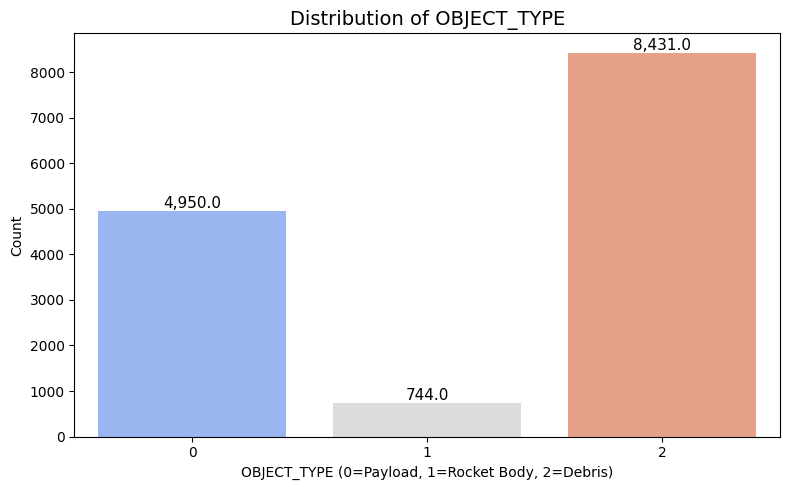

In [32]:
# Plot the barplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='OBJECT_TYPE', palette="coolwarm")

# Add value annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

# Titles and labels
plt.title('Distribution of OBJECT_TYPE', fontsize=14)
plt.xlabel('OBJECT_TYPE (0=Payload, 1=Rocket Body, 2=Debris)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

> A significant portion of objects in Earth's orbit consists of space debris. Current statistics indicate the following distribution: approximately 8,431 fragments classified as debris, 744 rocket bodies, and 4,950 operational payloads. This highlights the growing concern regarding space junk and its impact on active satellites and future space missions.

/tmp/ipykernel_524472/779950545.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df.sort_values('LAUNCH_DATE'),


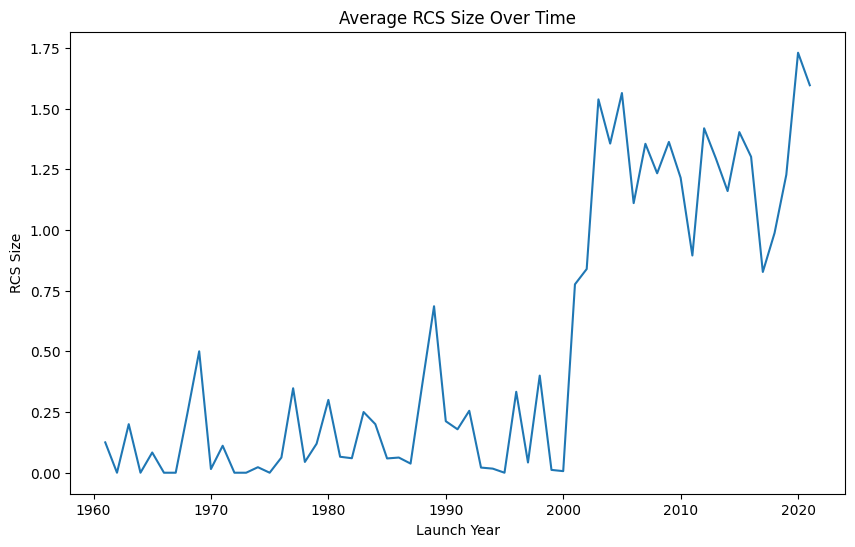

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.sort_values('LAUNCH_DATE'), 
             x='LAUNCH_DATE', y='RCS_SIZE', ci=None)
plt.title('Average RCS Size Over Time')
plt.xlabel('Launch Year')
plt.ylabel('RCS Size')
plt.show()


> This graphic illustrates a significant trend in space exploration and satellite deployment following 2000. It highlights the increasing prevalence of larger objects being launched into orbit around the Earth. 

* FRGUI – French Guiana, Guiana Space Centre (CSG), Europe’s spaceport (used by ESA, Arianespace).
* PKMTR – Pacific Missile Test Range (also related to Vandenberg, may refer to broader Pacific range).
* SRI – Sriharikota, ISRO’s Satish Dhawan Space Centre (India).
* TSC – Tyuratam Space Center (Baikonur Cosmodrome, Kazakhstan): The most historic Soviet/Russian launch facility.
* AFETR – Air Force Eastern Test Range (Cape Canaveral and Kennedy Space Center area, Florida).
* TTMTR – Trust Territory Missile Test Range (typically refers to Kwajalein Atoll, Marshall Islands).
* XSC --  These are more cryptic and may refer to:Decommissioned sites,Code names for test ranges,or tracking stations from classified launches or military payloads.
* AFWTR – Air Force Western Test Range (California, mainly Vandenberg AFB).
* JSC – Johnson Space Center—mainly for control, but may also be referenced for launches.


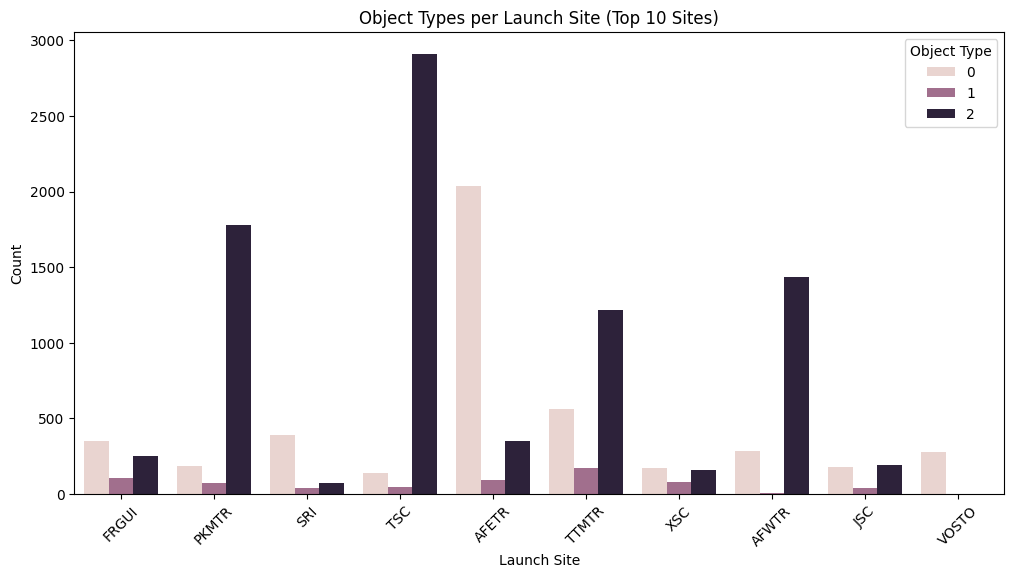

In [34]:
plt.figure(figsize=(12, 6))
top_sites = df['SITE'].value_counts().nlargest(10).index
sns.countplot(data=df[df['SITE'].isin(top_sites)], 
              x='SITE', hue='OBJECT_TYPE')
plt.title('Object Types per Launch Site (Top 10 Sites)')
plt.xticks(rotation=45)
plt.xlabel('Launch Site')
plt.ylabel('Count')
plt.legend(title='Object Type')
plt.show()


> The data presented in the accompanying graphic indicates that the Tyuratam Space Center (TSC), also known as the Baikonur Cosmodrome, located in Kazakhstan, has one of the highest concentrations of orbital debris. This is significant given the center's historical role as a primary launch facility for Soviet and Russian space missions. Following TSC, the Pacific Missile Test Range (PMTR), which encompasses the broader Pacific region and is associated with Vandenberg Space Force Base, exhibits a notable amount of debris. In addition, the Air Force Eastern Test Range (AFETR), situated in the Cape Canaveral and Kennedy Space Center area of Florida, ranks after the PMTR in terms of debris presence. This analysis underscores the environmental challenges posed by orbital debris in critical space operation zones.

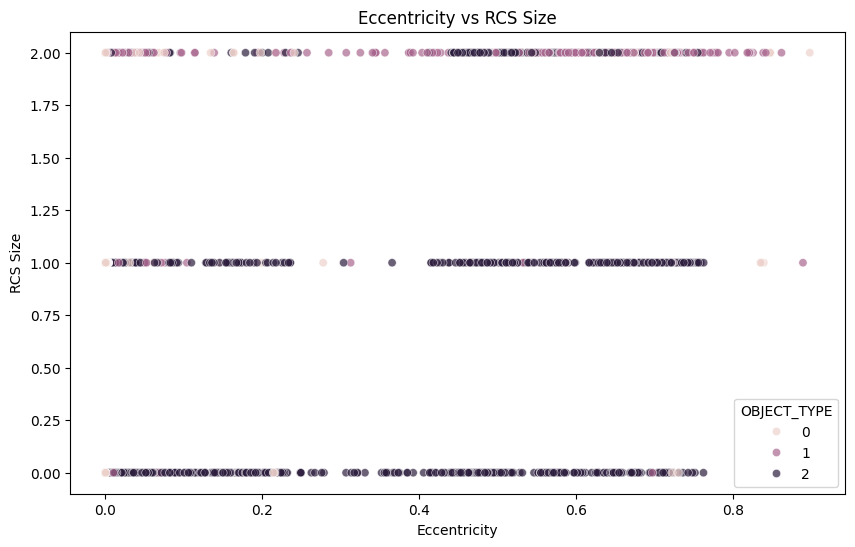

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ECCENTRICITY', y='RCS_SIZE', hue='OBJECT_TYPE', alpha=0.7)
plt.title('Eccentricity vs RCS Size')
plt.xlabel('Eccentricity')
plt.ylabel('RCS Size')
plt.show()


> There’s no strong visible correlation between eccentricity and RCS size

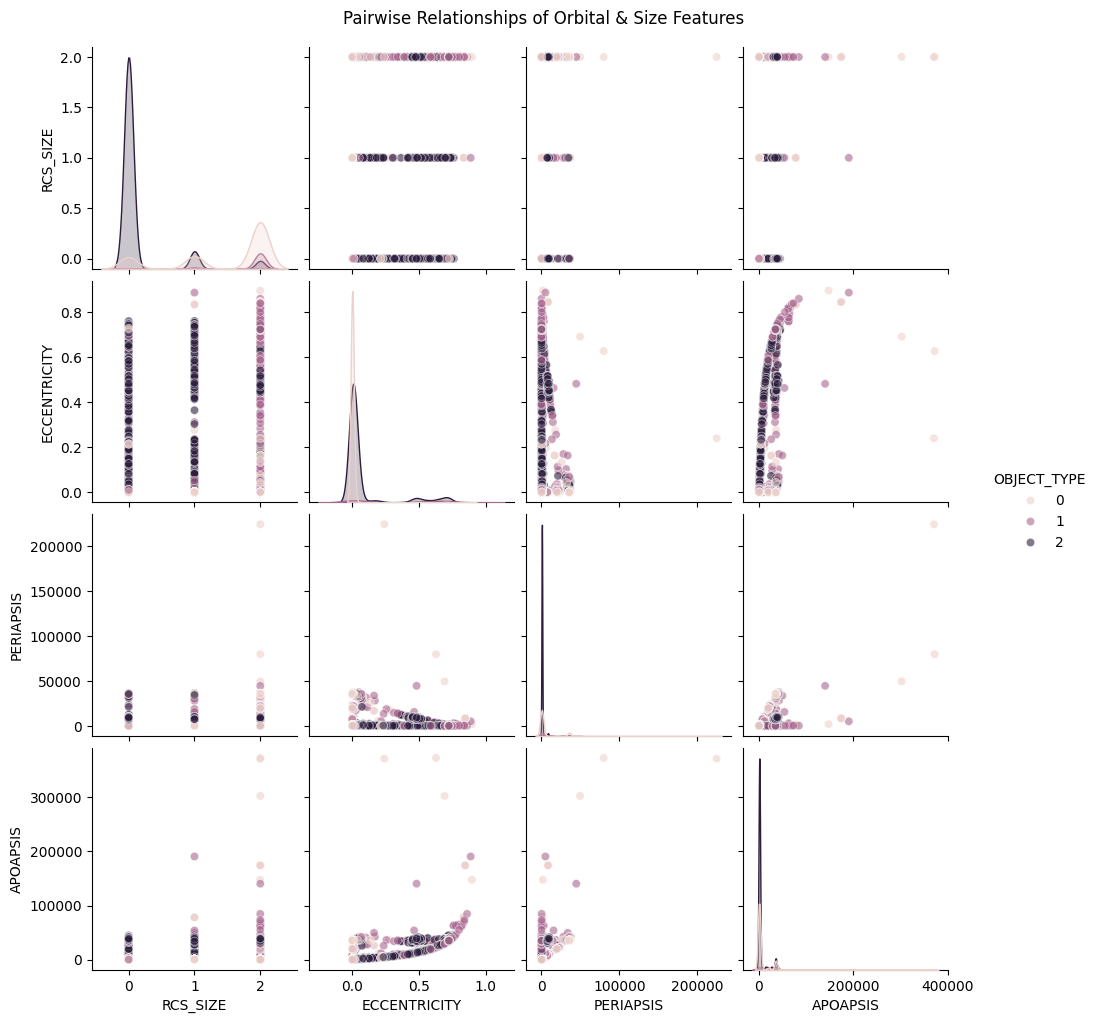

In [36]:
subset = df[['RCS_SIZE', 'ECCENTRICITY', 'PERIAPSIS', 'APOAPSIS', 'OBJECT_TYPE']]
sns.pairplot(subset, hue='OBJECT_TYPE', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Orbital & Size Features', y=1.02)
plt.show()


> The analysis of the pairplot reveals that the majority of the debris consists of small-sized fragments. Furthermore, the data regarding periapsis and apoapsis indicates that these objects are situated in orbit, potentially obstructing trajectories for spacecraft venturing into outer space.

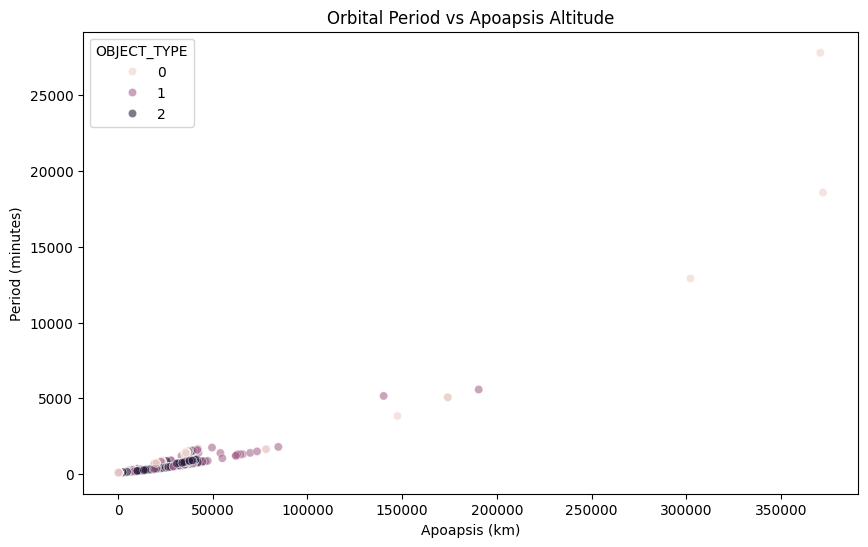

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='APOAPSIS', y='PERIOD', hue='OBJECT_TYPE', alpha=0.6)
plt.title('Orbital Period vs Apoapsis Altitude')
plt.xlabel('Apoapsis (km)')
plt.ylabel('Period (minutes)')
plt.show() #! further analysis needed

> The majority of objects in orbit complete one full orbital revolution in less than 5,000 minutes.

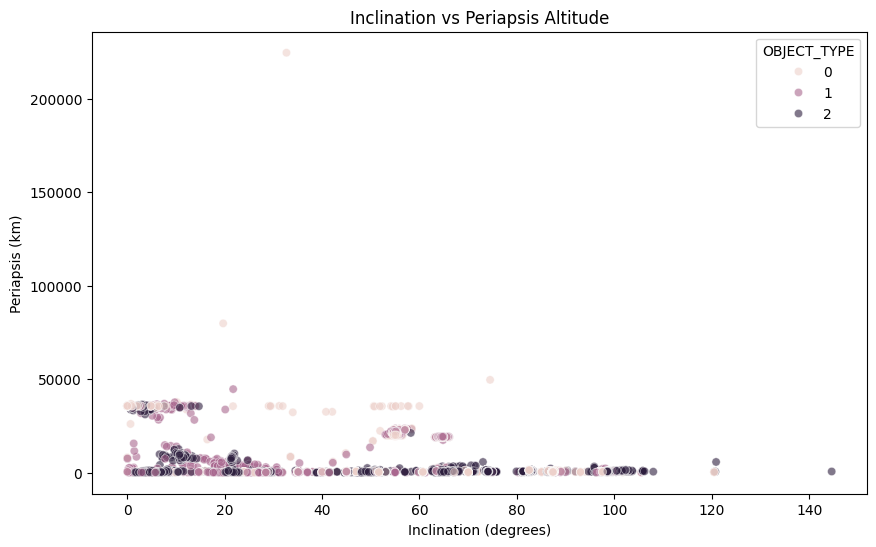

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='INCLINATION', y='PERIAPSIS', hue='OBJECT_TYPE', alpha=0.6)
plt.title('Inclination vs Periapsis Altitude')
plt.xlabel('Inclination (degrees)')
plt.ylabel('Periapsis (km)')
plt.show()

> The scatter plot shows that the majority of space debris objects are concentrated in low-inclination orbits (0–30°) with periapsis altitudes below ~2000 km, indicating a strong presence in Low Earth Orbit (LEO); debris becomes significantly less frequent at higher inclinations and altitudes, reflecting typical deployment zones and decay behaviors of past missions.

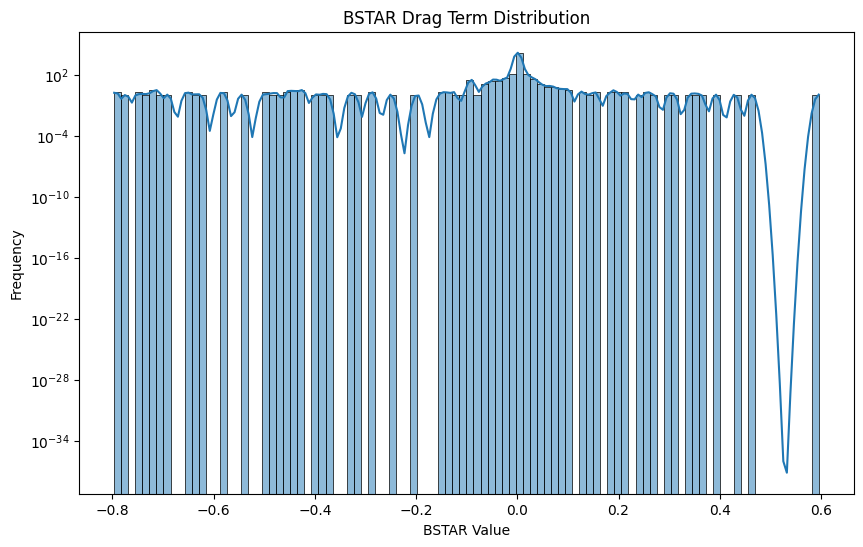

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BSTAR'], bins=100, kde=True)
plt.title('BSTAR Drag Term Distribution')
plt.xlabel('BSTAR Value')
plt.ylabel('Frequency')
plt.yscale('log')  # helps handle skewness
plt.show()

> The distribution of the BSTAR drag term, plotted on a logarithmic scale, shows a near-uniform frequency across values with a mild concentration around zero, suggesting that most orbital objects experience low but variable atmospheric drag.

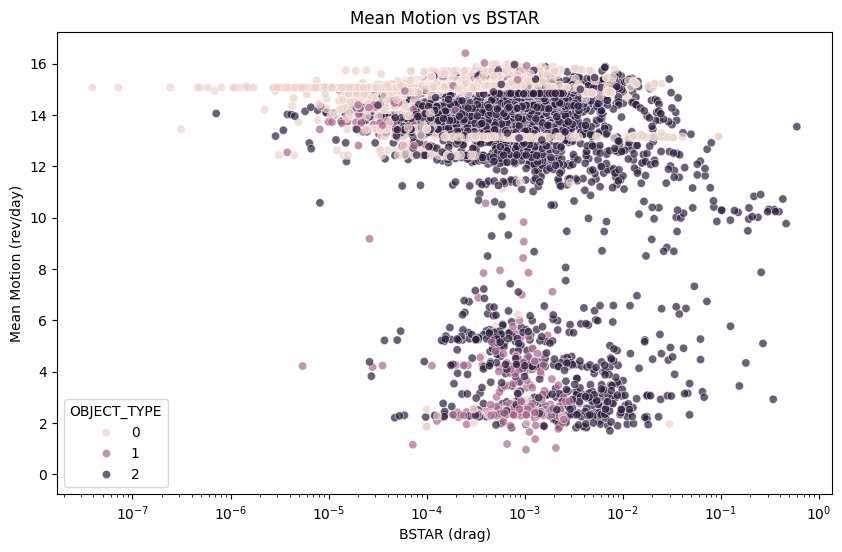

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BSTAR', y='MEAN_MOTION', hue='OBJECT_TYPE', alpha=0.7)
plt.title('Mean Motion vs BSTAR')
plt.xlabel('BSTAR (drag)')
plt.ylabel('Mean Motion (rev/day)')
plt.xscale('log')
plt.show()

> The graphic illustrates that debris exhibits a wide range of BSTAR values (10⁻⁷–10⁻¹), correlating with varying mean motion. This suggests differing orbital decay rates due to atmospheric drag depending on altitude and object characteristics.

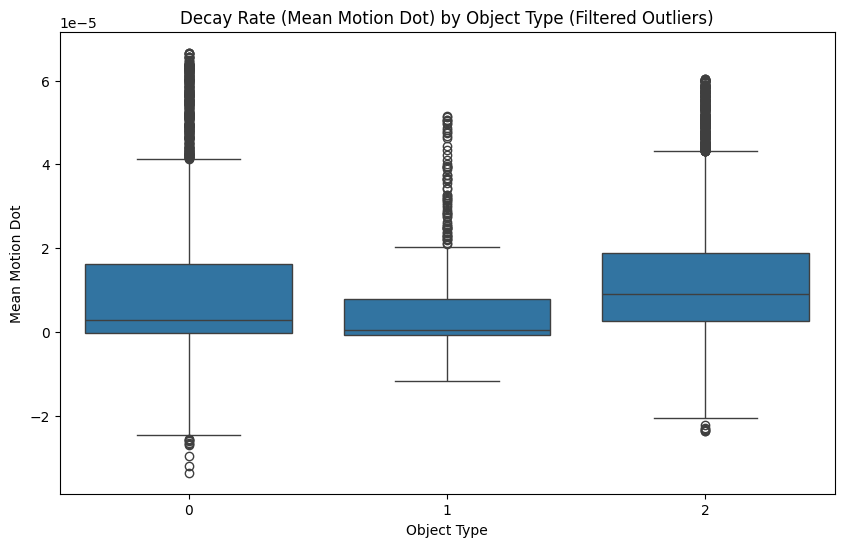

In [41]:

# Calculate bounds to filter extreme outliers
filtered_df = pd.DataFrame()
for obj_type in df['OBJECT_TYPE'].unique():
    group = df[df['OBJECT_TYPE'] == obj_type]
    q1 = group['MEAN_MOTION_DOT'].quantile(0.25)
    q3 = group['MEAN_MOTION_DOT'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.0 * iqr  # adjust from 1.5 to 1.0 for moderate outliers
    upper_bound = q3 + 1.0 * iqr
    filtered_group = group[(group['MEAN_MOTION_DOT'] >= lower_bound) & (group['MEAN_MOTION_DOT'] <= upper_bound)]
    filtered_df = pd.concat([filtered_df, filtered_group])

# Plot the cleaned boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='OBJECT_TYPE', y='MEAN_MOTION_DOT')
plt.title('Decay Rate (Mean Motion Dot) by Object Type (Filtered Outliers)')
plt.xlabel('Object Type')
plt.ylabel('Mean Motion Dot')
plt.show()

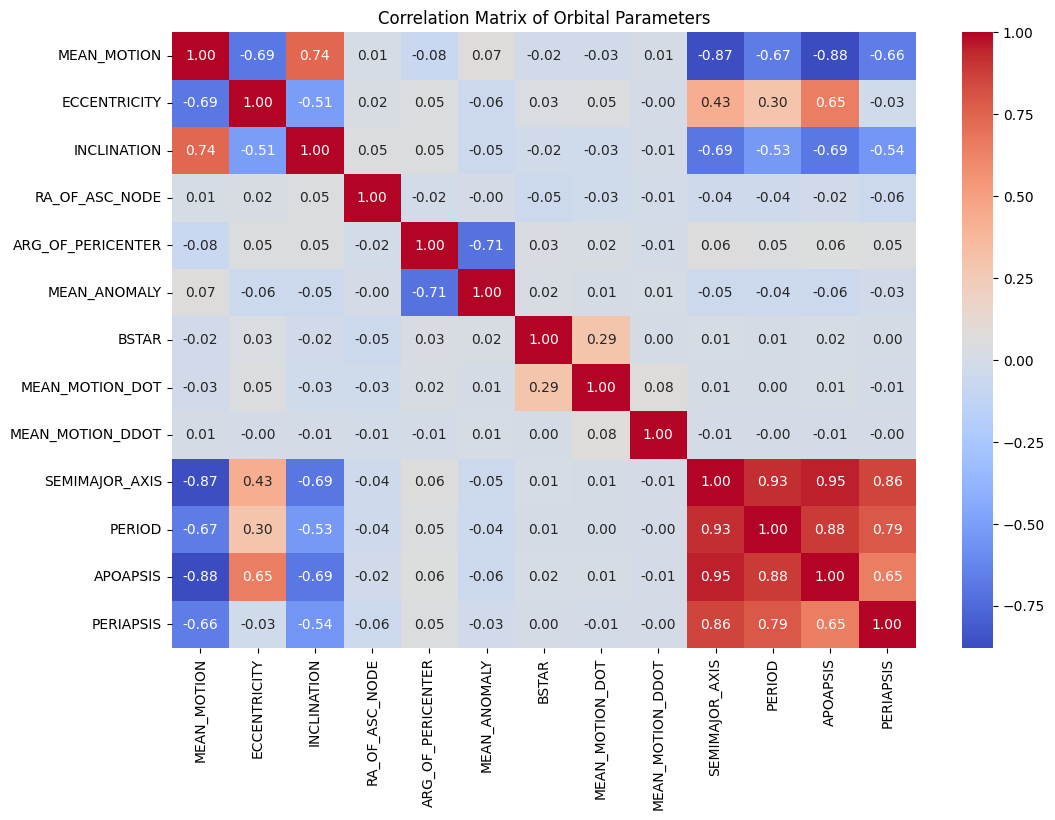

In [43]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION',
                         'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
                         'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT',
                         'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Orbital Parameters')
plt.show()

> The correlation matrix reveals that debris orbital dynamics are primarily influenced by strong negative correlations between mean motion and semimajor axis/apoapsis (reflecting Kepler's Third Law), while atmospheric drag (BSTAR) shows weak overall linkages except with mean motion derivatives, suggesting drag-driven decay effects are more pronounced in temporal changes than static orbital parameters.

> For further analysis, there are many possibilities to explore, particularly regarding the orbits of debris. There is still a lot of room for exploration in this area, as is the case with all aspects of space. I will delve deeper into this data in the descriptive analysis section of the notebook I am working on. This will aid in future engineering efforts and further analyses related to multicollinearity, dimensionality reduction, and more.

##### Just a video for motivation
[BEYOND THE HORIZON](https://www.youtube.com/watch?v=tKjbHv_0KKY) 

> "Find your place in space </br>
Space is vast and unexplored </br>
And there’s a lot of work to do."